# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [63]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [64]:
# verificando as colunas da base de dados
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [65]:
# filtrando apneas as colunas que iremos utilizar em uma nova variável
sinasc_1 = sinasc_raw[['munResNome', 'IDADEMAE', 'IDADEPAI']]

In [66]:
# Verificando a quantidade de linhas vazias na coluna de idade do pai
sinasc_1['IDADEPAI'].isna().sum()

19421

In [67]:
# Verificando a média de idade dos pais para cada municipio
sinasc_1.groupby('munResNome').mean()

,IDADEMAE,IDADEPAI
munResNome,,
Alta Floresta D'Oeste,25.991826,29.548701
Alto Alegre dos Parecis,24.844156,29.179104
Alto Paraíso,24.960177,28.833333
Alvorada D'Oeste,25.770732,30.757282
Ariquemes,25.607866,32.466667
Buritis,25.559177,30.812500
Cabixi,26.037500,34.333333
Cacaulândia,25.546667,36.333333
Cacoal,26.890102,30.931854


In [68]:
# Agora removendo as linhas vazias
sinasc_1.dropna().groupby('munResNome').mean()

,IDADEMAE,IDADEPAI
munResNome,,
Alta Floresta D'Oeste,25.892857,29.548701
Alto Alegre dos Parecis,24.679104,29.179104
Alto Paraíso,22.833333,28.833333
Alvorada D'Oeste,26.825243,30.757282
Ariquemes,28.133333,32.466667
Buritis,24.750000,30.812500
Cabixi,32.166667,34.333333
Cacaulândia,31.000000,36.333333
Cacoal,26.978605,30.931854


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [69]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [70]:
# Filtrando os registros para o dia 2019-10-24
sinasc_raw_filtrado = sinasc_raw[sinasc_raw['DTNASC'] == '2019-10-24']

In [71]:
# Calculando o peso médio por sexo e escolaridade da mãe e usando o reset index para obter a visualização do dataframe
sinasc_raw_filtrado.groupby(['SEXO', 'ESCMAE'])['PESO'].mean().reset_index()

,SEXO,ESCMAE,PESO
0,Feminino,12 anos ou mais,3055.000000
1,Feminino,4 a 7 anos,2500.000000
2,Feminino,8 a 11 anos,3027.777778
3,Masculino,1 a 3 anos,3310.000000
4,Masculino,12 anos ou mais,3501.428571
5,Masculino,4 a 7 anos,3714.285714
6,Masculino,8 a 11 anos,3464.600000


### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [72]:
# Agrupando os nascimentos por nome do municipio e verificando qual é o municipio com menos nascimentos
sinasc_raw.groupby('munResNome')['DTNASC'].count().sort_values().head(5)

munResNome
Município ignorado - RO     1
Castanheiras               32
Pimenteiras do Oeste       40
Primavera de Rondônia      43
Parecis                    44
Name: DTNASC, dtype: int64

O municipio com menos nascimentos é um municipio ignorado, portanto, iremos considerar o segundo municipio, Castanheiras

In [ ]:
# Filtrando a idade média, maxima e minima das maes e pais nesse municipio
sinasc_castanheiras = sinasc_raw[sinasc_raw['munResNome'] == 'Castanheiras'].groupby('munResNome')['IDADEMAE', 'IDADEPAI']

In [74]:
# Agrupando os dados
sinasc_castanheiras.agg([('idade minima', 'min'), ('idade média', 'mean'), ('idade máxima', 'max')])

IDADEMAE                              IDADEPAI              \
             idade minima idade média idade máxima idade minima idade média   
munResNome                                                                    
Castanheiras           17    27.28125           39         17.0   30.392857   

                           
             idade máxima  
munResNome                 
Castanheiras         43.0

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [79]:
# Alterando o formato da coluna para data
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'])

In [86]:
# Filtrar os registros que estão no mês de março
nascimentos_marco = sinasc_raw[sinasc_raw['DTNASC'].dt.month == 3]
nascimentos_marco.head(2)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [91]:
# Contando o número de nascimentos em março
nascimentos_marco.shape[0]

2456

In [94]:
# Descobrindo qual foi o municipio com maior quantiadde de nascimentos no mes de março
nascimentos_marco['munResNome'].value_counts().idxmax()

'Porto Velho'

In [95]:
# O valor de nascimentos desse municipio
nascimentos_marco['munResNome'].value_counts().max()

744

In [ ]:
- qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
- qual a idade media, maxima, minima dos pais nesse municipio?

In [111]:
# Agrupando os dados por nascimento em porto velho e no mes de março
porto_velho = nascimentos_marco[nascimentos_marco['munResNome'] == 'Porto Velho'].groupby('munResNome')

In [113]:
# Agregando os dados para a quantidade de filhos vivos
porto_velho['QTDFILVIVO', 'QTDFILMORT'].agg([('minimo', 'min'), ('média', 'mean'), ('máxima', 'max')])

<ipython-input-113-065ea4bb8915>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  porto_velho['QTDFILVIVO', 'QTDFILMORT'].agg([('minimo', 'min'), ('média', 'mean'), ('máxima', 'max')])


QTDFILVIVO                  QTDFILMORT                 
                minimo     média máxima     minimo     média máxima
munResNome                                                         
Porto Velho        0.0  1.295056    9.0        0.0  0.352734    4.0

In [114]:
# Agregando os dados para a idade dos pais
porto_velho['IDADEMAE', 'IDADEPAI'].agg([('idade minima', 'min'), ('idade média', 'mean'), ('idade máxima', 'max')])

<ipython-input-114-86074c14746b>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  porto_velho['IDADEMAE', 'IDADEPAI'].agg([('idade minima', 'min'), ('idade média', 'mean'), ('idade máxima', 'max')])


IDADEMAE                              IDADEPAI              \
            idade minima idade média idade máxima idade minima idade média   
munResNome                                                                   
Porto Velho           14   26.596774           44         19.0   34.629032   

                          
            idade máxima  
munResNome                
Porto Velho         62.0

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

In [115]:
sinasc_raw.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

In [121]:
sinasc_raw.select_dtypes(exclude=['int64','float64']).head(3)

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia


In [122]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

<ipython-input-141-0c4b3c768747>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  idade_mae_filhos['QTDFILVIVO', 'QTDFILMORT'].mean().plot()


<Axes: xlabel='IDADEMAE'>

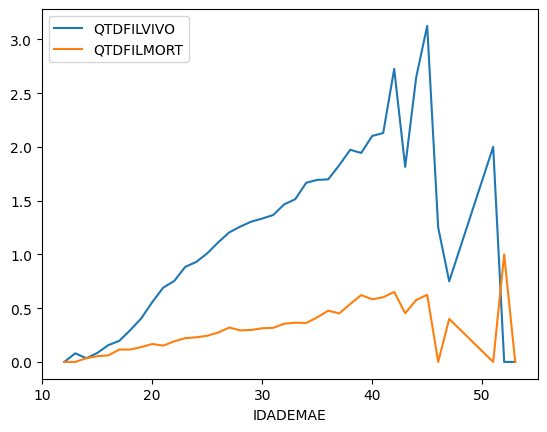

In [141]:
# Verificando se a idade da mãe possui influencia na quantidade de filhos mortos
idade_mae_filhos = sinasc_raw.groupby('IDADEMAE')
idade_mae_filhos['QTDFILVIVO', 'QTDFILMORT'].mean().plot()

A quantidade de filhos mortos começa a crescer gradativamente com a idade da mãe, porém, por algum motivo entre 45 e 50 anos essa quantidade cai abruptamente, tendo um salto próximo aos 55 anos.

In [161]:
# Definindo um DataFrame que contenha apenas as colunas 'APGAR5' e 'PARTO'
df = sinasc_raw[['APGAR1','APGAR5', 'PARTO']]

In [164]:
# Calculando a média do Apgar para cada tipo de parto
media_apgar_por_parto = df.groupby('PARTO')['APGAR1', 'APGAR5'].mean()

<ipython-input-164-4e92430253f6>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  media_apgar_por_parto = df.groupby('PARTO')['APGAR5', 'APGAR1'].mean()


In [165]:
media_apgar_por_parto

,APGAR5,APGAR1
PARTO,,
Cesáreo,9.167722,8.132882
Vaginal,9.202166,8.145145


Podemos ver que em média, o tipo de parto não tem grandes interferências no APGAR, vamos plotar um gráfico para conferir esta suspeita

In [190]:
tipo_parto = sinasc_raw['PARTO']
apgar_5 = sinasc_raw['APGAR5']

In [191]:
df_relacao = pd.crosstab(index=tipo_parto, columns=apgar_5)

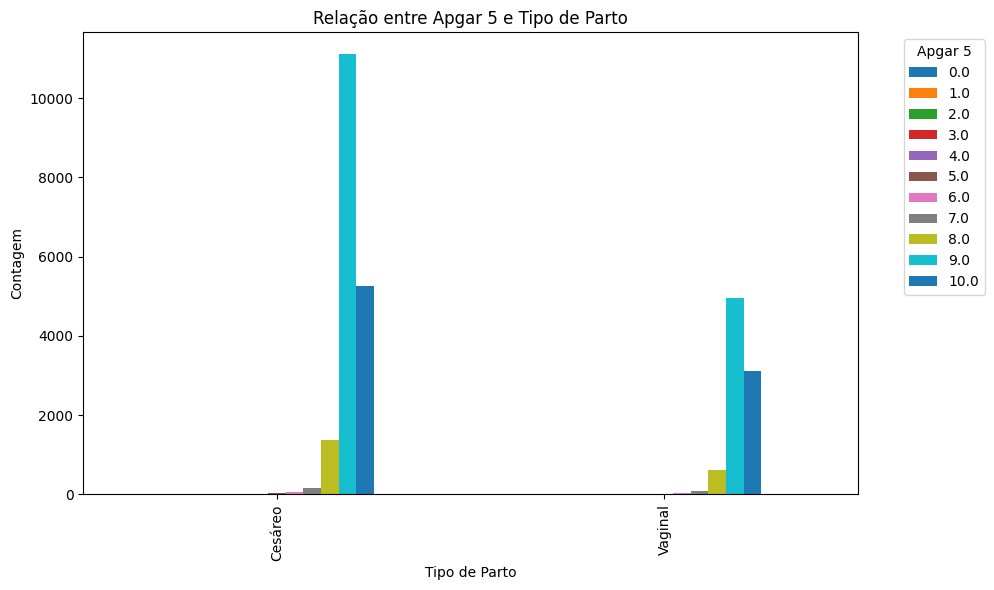

In [204]:
# Plotando os valores para melhor visualização
df_relacao.plot(kind= 'bar', stacked=False, figsize=(10, 6))
plt.title("Relação entre Apgar 5 e Tipo de Parto")
plt.xlabel("Tipo de Parto")
plt.ylabel("Contagem")
plt.legend(title='Apgar 5', bbox_to_anchor=(1.05, 1), loc='upper left')

Podemos observar que a distribuição de Apgar5 entre os dois métodos de parto são muito semelhantes, o que significa que o método do parto não deve ter grandes impactos sobre a saude do bebe nos primeiros minutos